# Predicting the sale price of Bulldozers using Machine Learning(Time data series)
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.
1. Data importation and Exploration
2. Feature Engineering
3. Cleaning up and preparing 

In [1]:
# importing all tools we need

#Data Analysis and plotting tools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer #function that enables filling in missing values
from sklearn.compose import ColumnTransformer #enables transformer on columns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder #converting non numerical data(categoriges) to numerical
from sklearn.compose import ColumnTransformer #converting non numerical data(categoriges) to numerical

#Modelling
from sklearn.ensemble import RandomForestRegressor #bcos we have a regression data
from sklearn.model_selection import GridSearchCV, train_test_split

# 1. Data importation and Exploration

In [2]:
#Load data
df= pd.read_csv('data/TrainAndValid.csv',low_memory=False) # 'low_memory=False' this was just added to remove a warning i was getting, not really important
df.shape # rows, columns 

(412698, 53)

In [3]:
#viewing Data
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# a function that helps us know the number of data mising in each column
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
#import data again but this time parse dates

df= pd.read_csv('data/TrainAndValid.csv',low_memory=False, 
                            parse_dates=['saledate']) 
df.head().T # to see all rows

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


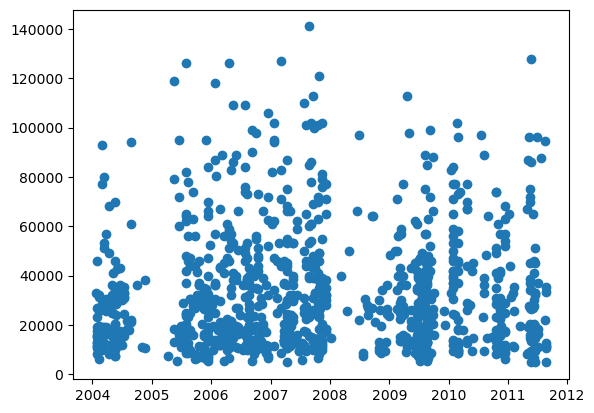

In [6]:
# plotting saledate and sale price
fig, ax= plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [7]:
# Sort DataFrame in date order
df.sort_values(by=['saledate'], inplace= True , ascending= True)
df['saledate'].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [8]:
#notice how the data is now sorted based date order
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# we make a copy of the original dataframe so when we manipulate the copy, we've still got our original data

df_tmp= df.copy()

# 2. Feature Engineering
This involves creating new features or modifying features

Add datetime parameters for saledate column(good to do this when dealing with time data series)

In [10]:
# we are going to add a date time parameter for the sale date column

# adding a sale year column
df_tmp['saleYear'] = df_tmp.saledate.dt.year
# adding a sale month column
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
# adding a sale day column
df_tmp['saleDay'] = df_tmp.saledate.dt.day
# adding a sale day of week column
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
# adding a sale day of year column
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [11]:
#Lets view the added columns
df_tmp.head().T # to see all rows 

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [12]:
# Now we have enriched our DataFrame with date time features, we can remove the saledate
df_tmp.drop('saledate', axis=1 , inplace= True)

In [13]:
df_tmp.head().T
# Note: saledate column doesn't exist anymore

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


# 3. Cleaning up and Preparing Data
Filling up missing values and preparing Data for Machine Learning Training

In [15]:
# a function that helps us know the number of data mising in each column
df_tmp.isna().sum()
# Notice we have missing data, we need to fill them up

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [16]:
# a function to help us know the data types of each column
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [17]:
# Lets turn all non numeric(objects/strings) data in categories
#we will build a For loop to find the string/object columns to convert them into categories
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content): #use string is data is of string type
        df_tmp[label]= content.astype('category').cat.as_ordered() #Keep column name but change from string/object to category

In [18]:
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

Filling in missing numerical values

In [19]:
# A for loop to print out the numeric contents
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [20]:
# A for loop to check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [21]:
# Fill the numerical missing values with the mediam(better to use median than mean)

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Adding a binary column which tells us if the data was missing(in order to know which rows were fillled)
            df_tmp[label+'_is_missing']= pd.isnull(content)
            #Fill missing numeric values with median(better to use median than mean)
            df_tmp[label]= content.fillna(content.median())

In [22]:
# A for loop to check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
# Note: nothing was printed this means all missing numeric values have been filled

In [23]:
# check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()
# This means 20136 missing values have been filled with the median

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

Filling in missing categorical values

In [24]:
# A for loop to check for which categorical columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
            df_tmp[label+'_is_missing']= pd.isnull(content)
            # Turn categories into numbers and add +1
            df_tmp[label]= pd.Categorical(content).codes+1 
        

In [26]:
df_tmp.head().T
# categorical values have been filled
# The places labeled 'True' means values we initially missing
# True=1, False=0

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [27]:
df_tmp.isna().sum()
# Notice we have don't have missing data anymore

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

# 4. Fitting Machine Learning Model
* All values are numeric
* No missing values

Now time to build machine learning model

In [28]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [29]:
len(df_tmp)

412698

Splitting data into train/validation sets

In [31]:
#split the data into train, validation(tuning sets)
df_val = df_tmp[df_tmp.saleYear == 2012] # every row where the sale year is 2012
df_train = df_tmp[df_tmp.saleYear != 2012] # every row where the sale year is not 2012

len(df_val), len(df_train)

(11573, 401125)

In [32]:
# Split data into X and Y
X_train, Y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, Y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# 5 Creating/Customising an Evaluation Function (Root Mean squared log error)
Root Mean Squared log error an evaluation metric commonly used to measure the performance of regression models, especially when predicting values that can vary across several orders of magnitude

In [33]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score # these are regression problem evaluation metrics

def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared log error between predictions
    and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create functions to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores= {
        'Training MAE': mean_absolute_error(Y_train, train_preds),
        'Valid MAE': mean_absolute_error(Y_valid, val_preds),
        'Training RMSLE': rmsle(Y_train, train_preds),
        'Valid RMSLE': rmsle(Y_valid, val_preds),
        'Training R^2': r2_score(Y_train, train_preds),
        'Valid R^2':  r2_score(Y_valid, val_preds),
    }
    return scores

Reducing data to be tested on in order to reduce run time

In [34]:
# change max_samples value
model =RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000) # putting max_samples = 10000 will make the model run only 10000 data out of the 400000


In [35]:
%%time
model.fit(X_train, Y_train)


CPU times: total: 2min 41s
Wall time: 21.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [36]:
#run function
show_scores(model)

# valid MAE is slightly higher than training MAE means we are not over fitting

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

# 6. Feature Importance
Feature importance is another way of asking "which features contributed the most to the outcomes of the model and how did they contribute?"

In [38]:
#Find feature importance of our model
model.feature_importances_

array([4.81382349e-02, 2.26248605e-02, 2.96496488e-02, 1.07927243e-03,
       5.92733555e-03, 2.51855319e-01, 4.18515309e-03, 1.62734184e-03,
       2.44185446e-02, 4.70228642e-02, 5.77325398e-02, 4.01605795e-03,
       5.67796434e-03, 2.15957741e-01, 3.12966837e-02, 1.15603859e-02,
       1.86911840e-03, 1.58631609e-03, 1.47202823e-03, 2.35191239e-02,
       6.95798509e-04, 2.40507940e-04, 1.45976988e-03, 2.14944291e-04,
       1.22242119e-03, 5.53187617e-05, 1.62080945e-03, 2.26947237e-02,
       3.41885107e-04, 3.01379262e-04, 4.47155935e-03, 4.14756721e-03,
       2.97945200e-03, 6.47383047e-04, 5.38110216e-04, 3.83226809e-03,
       1.49471065e-03, 1.55948966e-02, 8.37608421e-04, 2.02385611e-04,
       2.67159742e-04, 1.20711179e-03, 1.59966844e-03, 9.18589730e-04,
       7.16916543e-04, 9.16552395e-04, 1.94377163e-04, 2.77720382e-03,
       1.18741990e-03, 2.05152234e-04, 1.70343148e-04, 6.47745211e-02,
       4.58841854e-03, 1.30318185e-02, 6.58337683e-03, 1.38579377e-02,
      

In [40]:
# Function for plotting feature importance
def plot_features(columns, importances, n=20): #bcos we have a lot of features(102) we will set n=20 to plot only the important 20
    df= (pd.DataFrame({'features': columns,
                       'feature_importances': importances})
         .sort_values('feature_importances', ascending=False) # from highest to lowest
         .reset_index(drop=True))

    # plot the dataframe
    fig, ax= plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'] [:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis() 

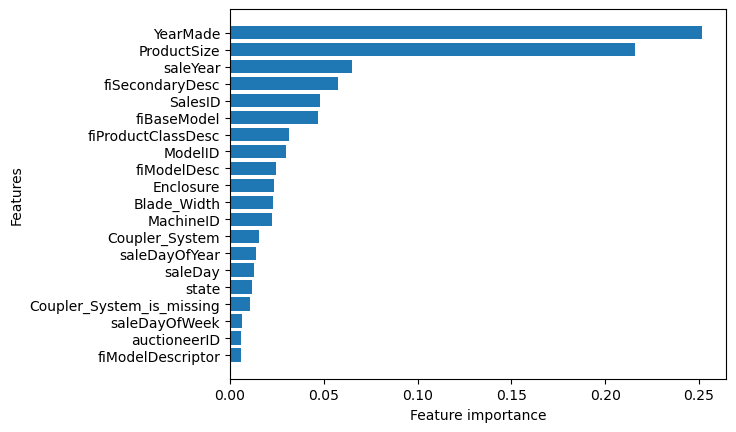

In [41]:
# plotting it
plot_features(X_train.columns, model.feature_importances_)

#now we can see the most important features and we can know which data to focus more on maybe later in the future

# 7.Conclusion

We have a ROOT MEAN SQUARED LOG ERROR evaluation metric of 0.29 on our Validation data set. Overall, an RMSLE of 0.29 is a strong result for a bulldozer price prediction model and suggests that  model performs well at capturing both trends and variations in the data.